# Yahoo Finance Integration

### Informações:
- pip install yfinance
- pip install mplfinance



### References:

Professor:
- Setup 9.1: http://atpalex.blogspot.com/2014/08/setup-91.html
- Setup 9.1 com Python: https://lrsolano.com/python-setup-9-1/

Links Uteis:
- https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e
- https://medium.com/@rodrigobercinimartins/como-extrair-dados-da-bovespa-sem-gastar-nada-com-python-14a03454a720
- https://pypi.org/project/yfinance/
- https://algotrading101.com/learn/yfinance-guide/
- https://blog.quantinsti.com/historical-market-data-python-api/
- https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836
- https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/



- Ajudou a plotar a média móvel exponencia em cima do candles: https://stackoverflow.com/questions/45314559/example-of-candlestick-ohlc-sharing-a-solution-2-questions
- Ajudou a plotar a média móvel exponencia em cima do candles: https://saralgyaan.com/posts/python-candlestick-chart-matplotlib-tutorial-chapter-11/
- Outras opções para candlestick: https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh
- Código dos Ativos: https://finance.yahoo.com/quote/%5EBVSP/components/
- mplfinance: https://github.com/matplotlib/mplfinance

Média móvel:
- https://www.tororadar.com.br/investimento/analise-tecnica/medias-moveis#:~:text=MME%3A%20%7BPre%C3%A7o%20de%20Fechamento%20%2D,uma%20MME%2018%2C18%25
- https://www.bussoladoinvestidor.com.br/media-movel-exponencial/#:~:text=F%C3%B3rmula%20da%20M%C3%A9dia%20M%C3%B3vel%20Exponencial,os%20pre%C3%A7os%20do%20per%C3%ADodo%20escolhido.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

import yfinance as yf

### Collect historical data from a Specific Stock

In [41]:
def getHistory(stock, period):
    """
    returns an n period exponential moving average for
    the time series s
    
    string stock: Stock name in the Bovespa (MGLU3, PETR4, VVAR3, OIBR3, etc)
    string speriod: Range of the time of the samples (1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max)

    returns a dataframe with the historic of the selected period
    """
    stockCode = str(stock)+".SA"
    stock = yf.Ticker(stockCode)

    # get stock info
    #print(stock.info)

    # get historical market data
    history = stock.history(period=period)
    history = history.drop(columns = ['Dividends', 'Stock Splits'])

    return history

### Calculate the Exponential Moving Avereage 9

In [61]:
def calculateMME(df, n):
    """
    returns an n period exponential moving average for
    the time series s

    pd.Dataframe df is the original dataframe - it needs to contain a 'Close' named column
    int          n is the number of periods to consider in the calculus

    returns a dataframe with a new column containing the MME
    """
    
    k  = 2 / (n+1)
    
    df['MME'] = df['Close']
    df['MME'].iloc[n-1] = df['Close'].iloc[0:n-2].mean()
    
    for i in range(n, len(df)):
        df['MME'].iloc[i] = (df['Close'].iloc[i] - df['MME'].iloc[i-1])*k + df['MME'].iloc[i-1]
        #MME = (Close[i] - MME[i-1])*k + MME[i-1] 
    
    return df


### Plotting Data

In [71]:
def plot_p(df):
    #Add a column to Time
    df['t'] = df.index.values
    df['t'] = pd.to_datetime(df['t'])
    df['t'] = df['t'].map(mpdates.date2num)
    
    #Reorder the columns: it's important for the plotting method
    candle = df[['t', 'Open', 'High', 'Low', 'Close']]
    
    fig, ax = plt.subplots()
    candlestick_ohlc(ax,
                      candle.values,
                      width=0.6,
                      colorup='g',
                      colordown='r',
                      alpha=1)
    
    #Plotting Line of MMEn over the Dataframe
    if ('MME' in df.columns):
        df['MME'].plot(ax=ax)
    
    #Formatting Date
    date_format = mpdates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    
    plt.show()  

C:\Users\Adrion\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-71-25306ee8c971>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t'] = df.index.values
<ipython-input-71-25306ee8c971>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

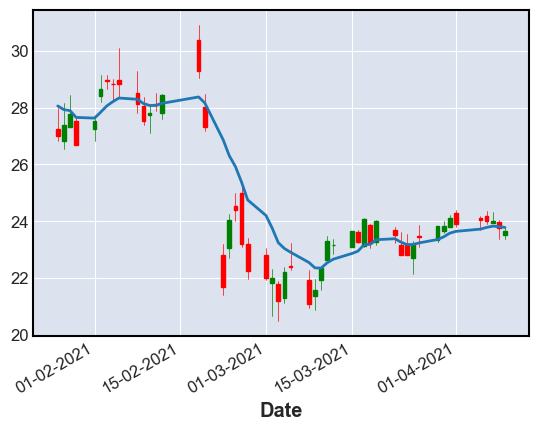

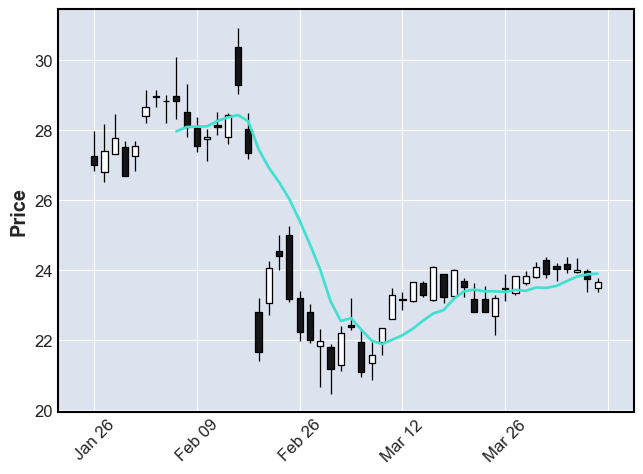

In [73]:
## TESTING CELL

history = getHistory('PETR4','5y')
historyWithEMA9 = calculateMME(history, 9)

tail = historyWithEMA9.tail(50) 

plot_p(tail)
mpf.plot(tail,type='candle', mav=9)

In [74]:
df = history 
#df['Operation'] = 'None'
#df['BalancePerShares'] = 0

orders = [[]]
#Time, Operation, Price, StopLoss, status

#None 
#Buy
#Hold
#Sell
#Stop

for i in range(10, len(df)):
        
    #If the curve was descending
    if (df['MME'].iloc[i-2] >= df['MME'].iloc[i-1]):

        #If there was a turn
        if (df['MME'].iloc[i] > df['MME'].iloc[i-1]):
            orders.push[df['t'].iloc[i],'Buy', df['High'].iloc[i]+0.01, df['Low'].iloc[i], 'open']
        
    elif (len(orders) !=  0):
        if(orders[-1][1] == 'Buy')
            

        else:
            
            

    
    
    
    
    
    df['MME'].iloc[i] = (df['Close'].iloc[i] - df['MME'].iloc[i-1])*k + df['MME'].iloc[i-1]
    #MME = (Close[i] - MME[i-1])*k + MME[i-1] 

NameError: name 'buy' is not defined